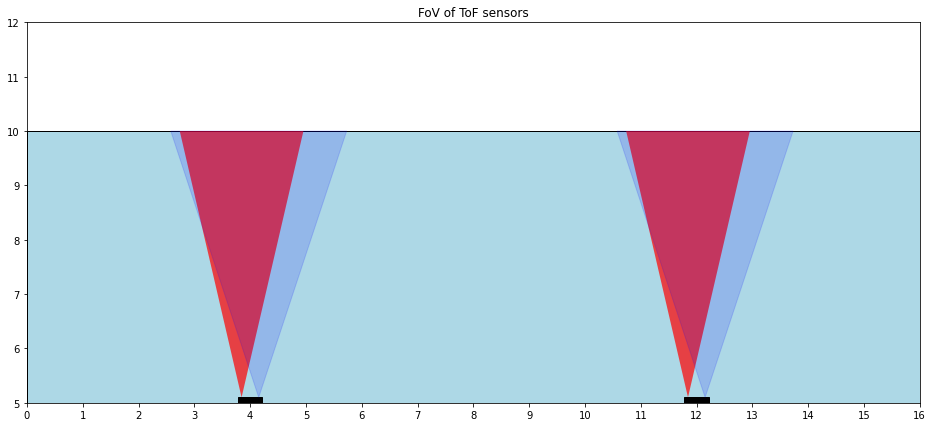

In [176]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
import numpy as np

size = 10
L = 160 
D = 200
d = 100
R = D/2
r = d/2

y_offset = r/size

def FoV_ToF(x_position, y_position, tri_height, frame_width=0.6, frame_height=0.3):
    rect_width = 4.4/size
    rect_height = 0.1
    rect_x = x_position - rect_width / 2
    rect_y = y_position + y_offset# y 좌표 업데이트
    offset = 0.665/size

    angle_1 = 25
    angle_2 = 35

    tri_base_1 = 2 * tri_height * np.tan(np.deg2rad(angle_1 / 2)) / size
    tri_base_2 = 2 * tri_height * np.tan(np.deg2rad(angle_2 / 2)) / size

    # 빨간색 삼각형의 꼭짓점
    red_triangle_vertices = [
        (rect_x + offset, rect_y + rect_height),
        (rect_x + offset + tri_base_1 / 2, rect_y + tri_height / size),
        (rect_x + offset - tri_base_1 / 2, rect_y + tri_height / size)
    ]
    
    # 파란색 삼각형의 꼭짓점
    blue_triangle_vertices = [
        (rect_x + rect_width - offset, rect_y + rect_height),
        (rect_x + rect_width - offset + tri_base_2 / 2, rect_y + tri_height / size),
        (rect_x + rect_width - offset - tri_base_2 / 2, rect_y + tri_height / size)
    ]

    plt.gca().add_patch(patches.Rectangle((rect_x, rect_y), rect_width, rect_height, edgecolor='black', facecolor='black'))
    plt.gca().add_patch(patches.Polygon(red_triangle_vertices, closed=True, color='red', alpha=0.7, linewidth=0))
    plt.gca().add_patch(patches.Polygon(blue_triangle_vertices, closed=True, color='blue', alpha=0.15))
    
def plot_quartic_function(params, Rec_h, Rec_v):
    a, p, q, k = params
    x = np.linspace(0, L/size, 1000)
    y = a / 4 * (x - p) ** 4 - a * k * k / 2 * (x - p) ** 2 + q
    plt.plot(x, y, color='black')
    plt.xlim(0, Rec_h)
    plt.ylim(0, Rec_v + 2)
    plt.xticks(np.arange(0, 17, 1))
    plt.yticks(np.arange(0, 6, 1))

def plot_quadratic_function(a, p, q):
    x = np.linspace(0, 16, 1000) # x 범위 설정
    y = a * (x - p)**2 + q
    y = np.clip(y, None, 5) # y값이 5를 넘지 않게 자르기
    plt.plot(x, y, color='black')

def plot_arc(center_x, center_y, s1, start_angle=0, end_angle=180, color='red'):
    arc = patches.Arc([center_x, center_y], s1*2, s1*2, theta1=start_angle, theta2=end_angle, color=color)
    plt.gca().add_patch(arc)
    
def plot_ellipse(x_center, y_center, width, height, angle=0, color='#FFDEAD'):    
    ellipse = Ellipse((x_center, y_center), width, height, angle=angle, color=color)
    plt.gca().add_patch(ellipse)
    
def plot_graph(n):
    

    Rec_h = L/size
    Rec_v = (D-d)/2/size
    
    plt.figure(figsize=(Rec_h, Rec_v+2))
    
    # 직사각형 배경
    plt.gca().add_patch(patches.Rectangle((0, r/size), Rec_h, Rec_v, edgecolor='black', facecolor='lightblue'))
        
    # ToF with FoV 그리기
    total_width = L/size
    offset = total_width/n/2
    distance_between_shapes = total_width / n

    for i in range(n):
        position_x = offset + i * distance_between_shapes
        FoV_ToF(position_x, 0, Rec_v*size)        

#     # 4차 함수
#     plot_quartic_function(params, Rec_h, Rec_v)

    
    # Plot 설정
    plt.xlim(0, Rec_h)
    plt.ylim(r/size, R/size+2)

    plt.xticks(np.arange(0, Rec_h+1, 1))
    plt.yticks(np.arange(r/size, R/size+3, 1))

    #plt.grid(True, which='both', linestyle='-', linewidth=0.5)

    plt.title('FoV of ToF sensors')

plot_graph(2) # 4개의 도형을 배치
#plot_ellipse(8, 3.5, 1.2, 1.6)


In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
from matplotlib.patches import FancyArrowPatch
import numpy as np
from scipy.stats import norm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

size = 10
L = 160 
D = 200
d = 100
R = D/2
r = d/2

y_offset = r/size
resize = 3

class FoV_ToF:
    def __init__(self, x_position, y_position, tri_height, frame_width=0.6, frame_height=0.3):
        self.x_position = x_position
        self.y_position = y_position + y_offset
        self.tri_height = tri_height
        self.rect_width = 4.4/size *resize
        self.rect_height = 0.75
        self.rect_x = x_position - self.rect_width / 2
        self.rect_y = y_position + y_offset
        self.offset = 0.665/size*resize*2
        self.angle_1 = 35
        self.angle_2 = 25

        self.tri_base_1 = 2 * tri_height * np.tan(np.deg2rad(self.angle_1 / 2)) / size
        self.tri_base_2 = 2 * tri_height * np.tan(np.deg2rad(self.angle_2 / 2)) / size

        # 빨간색 삼각형의 꼭짓점
        self.red_triangle_vertices = [
            (self.rect_x + self.offset, self.rect_y + self.rect_height),
            (self.rect_x + self.offset + self.tri_base_1 / 2, self.rect_y + self.tri_height / size),
            (self.rect_x + self.offset - self.tri_base_1 / 2, self.rect_y + self.tri_height / size)
        ]
        
        # 파란색 삼각형의 꼭짓점
        self.blue_triangle_vertices = [
            (self.rect_x + self.rect_width - self.offset, self.rect_y + self.rect_height),
            (self.rect_x + self.rect_width - self.offset + self.tri_base_2 / 2, self.rect_y + self.tri_height / size),
            (self.rect_x + self.rect_width - self.offset - self.tri_base_2 / 2, self.rect_y + self.tri_height / size)
        ]
        
        #호 변수
        self.arc_center = self.red_triangle_vertices[0] 
        self.arc_radius = 0
        self.arc_diameter = self.arc_radius * 2
        self.arc_theta1 = 90 - self.angle_1/2  # 시작 각도
        self.arc_theta2 = 90 + self.angle_1/2 # 끝 각도
    def draw(self):
        # 센서 칩
        plt.gca().add_patch(patches.Rectangle((self.rect_x, self.rect_y), self.rect_width, self.rect_height, edgecolor='black'
                                              , facecolor='black',zorder = 3))
        # Collector
        plt.gca().add_patch(patches.Polygon(self.red_triangle_vertices, closed=True, color='red',
                                            alpha=0.6, linewidth=0,zorder = 1))
        # Emitter
        plt.gca().add_patch(patches.Polygon(self.blue_triangle_vertices, closed=True, color='blue',
                                            alpha=0.3,linewidth=0,zorder = 1))
        plt.text(self.rect_x+self.rect_width/2, self.rect_y + self.rect_height/2, 'ToF',
                 ha='center',va='center',fontsize=25,color='white',fontweight ='bold',fontname  = 'Arial',zorder=3)
    def draw_arc(self):
        # 여기에 호를 그리는 코드 추가 가능
        plt.gca().add_patch(patches.Arc(self.arc_center,self.arc_diameter, self.arc_diameter, theta1=self.arc_theta1, theta2=self.arc_theta2,linewidth=2))
    def update_arc(self, radius):
        self.arc_radius = radius/10
        self.arc_diameter = self.arc_radius * 2
        self.draw_arc() # 변경 사항을 반영하여 다시 그립니다.
    
def plot_normal_distribution(mu=0, sigma=1, a=1, h_shift=0, v_shift=0, color='purple', x_range=None):
    """
    mu: 평균값
    sigma: 표준편차
    a: 계수 (높이 조정)
    h_shift: 수평 이동
    v_shift: 수직 이동
    color: 그래프 색상
    x_range: x축 범위
    """
    if x_range is None:
        x_range = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    else:
        x_range = np.linspace(x_range[0], x_range[1], 1000)
        
    y = -a * norm.pdf(x_range, mu, sigma) + v_shift
    plt.plot(x_range + h_shift, y, color=color,linewidth=4)
    plt.fill_between(x_range + h_shift, y, y2 = (D-d)/2/size+6, where=(y <= (D-d)/2/size+6),
                     color='white', interpolate=True,zorder = 2)

def Arrow_pdf(Xpos = 0, Ypos =0):
    a=6
    sigma = 2
    ToF_Height = 0.75
    Arrow_dist = 0.6
    Arrow = a/(sigma*np.sqrt(2*np.pi))
    Xpos += 0.665
    plt.gca().add_patch(FancyArrowPatch((Xpos, 5+ToF_Height), (Xpos, Ypos-Arrow+0.1), mutation_scale=30,
                                        arrowstyle="-|>", color="white",linewidth = 10,alpha = 0.9,zorder = 1))
    plt.gca().add_patch(FancyArrowPatch((Xpos, 5+ToF_Height), (Xpos, Ypos-Arrow), mutation_scale=30,
                                        arrowstyle="-|>", color="red",linewidth = 5,alpha = 0.9,zorder = 1))
    
    
    plt.gca().add_patch(FancyArrowPatch((Xpos+Arrow_dist, Ypos-Arrow), (Xpos+Arrow_dist, 5+ToF_Height-0.15), mutation_scale=30,
                                        arrowstyle="-|>", color="white",linewidth = 10,alpha = 0.9,zorder = 1))
    plt.gca().add_patch(FancyArrowPatch((Xpos+Arrow_dist, Ypos-Arrow), (Xpos+Arrow_dist, 5+ToF_Height-0.05), mutation_scale=30,
                                        arrowstyle="-|>", color="blue",linewidth = 5,alpha = 0.9,zorder = 1))
def Arrow(Xpos = 0, Ypos =0):
    ToF_Height = 0.75
    Arrow_dist = 0.6
    Xpos += 0.665
    plt.gca().add_patch(FancyArrowPatch((Xpos, 5+ToF_Height), (Xpos, Ypos+0.1), mutation_scale=30,
                                        arrowstyle="-|>", color="white",linewidth = 10,alpha = 0.9,zorder = 1))
    plt.gca().add_patch(FancyArrowPatch((Xpos, 5+ToF_Height), (Xpos, Ypos), mutation_scale=30,
                                        arrowstyle="-|>", color="red",linewidth = 5,alpha = 0.9,zorder = 1))
    
    
    plt.gca().add_patch(FancyArrowPatch((Xpos+Arrow_dist, Ypos), (Xpos+Arrow_dist, 5+ToF_Height-0.15), mutation_scale=30,
                                        arrowstyle="-|>", color="white",linewidth = 10,alpha = 0.9,zorder = 1))
    plt.gca().add_patch(FancyArrowPatch((Xpos+Arrow_dist, Ypos), (Xpos+Arrow_dist, 5+ToF_Height-0.05), mutation_scale=30,
                                        arrowstyle="-|>", color="blue",linewidth = 5,alpha = 0.9,zorder = 1))

        
def plot_graph(n, balloon =True,show_label=True):
    
    Rec_h = L/size
    Rec_v = (D-d)/2/size
    figure_size = 0.9
    plt.figure(figsize=(Rec_h*figure_size, (Rec_v+5)*figure_size))
    
    # 직사각형 배경
        
    if balloon:
        plt.gca().add_patch(patches.Rectangle((0, r/size), Rec_h, Rec_v, edgecolor='black', facecolor='lightblue',zorder = 1,linewidth=0))

        # ToF with FoV 그리기
        total_width = L/size
        offset = total_width/n/2
        distance_between_shapes = total_width / n

        sensors = [] # 센서 인스턴스를 저장할 리스트
        for i in range(n):
            position_x = offset + i * distance_between_shapes
            sensor = FoV_ToF(position_x, 0, Rec_v*size)
            sensor.draw()
            sensors.append(sensor) # 센서 인스턴스를 리스트에 추가
        plt.axhline(Rec_v+5, color='black', linewidth=4,linestyle='--')
        # Plot 설정
        plt.xlim(0, Rec_h)
        plt.ylim(r/size, R/size+5)
    else:
        # ToF with FoV 그리기
        total_width = L/size
        offset = total_width/n/2
        distance_between_shapes = total_width / n

        sensors = [] # 센서 인스턴스를 저장할 리스트
        for i in range(n):
            position_x = offset + i * distance_between_shapes
            sensor = FoV_ToF(position_x, 0, Rec_v*size+50)
            sensor.draw()
            sensors.append(sensor) # 센서 인스턴스를 리스트에 추가

        # Plot 설정
        plt.xlim(0, Rec_h)
        plt.ylim(r/size, R/size+5)
        
    if show_label:
        plt.xticks(np.arange(0, Rec_h+1, 1))
        plt.yticks(np.arange(r/size, R/size+6, 1))
        plt.title('FoV of ToF sensors')
    else:
        plt.xticks([])
        plt.yticks([])
        plt.title('')


    return sensors # 센서 인스턴스 리스트 반환

C:\Users\JH_LAB\AppData\Local\Temp\ipykernel_15916\2363590986.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


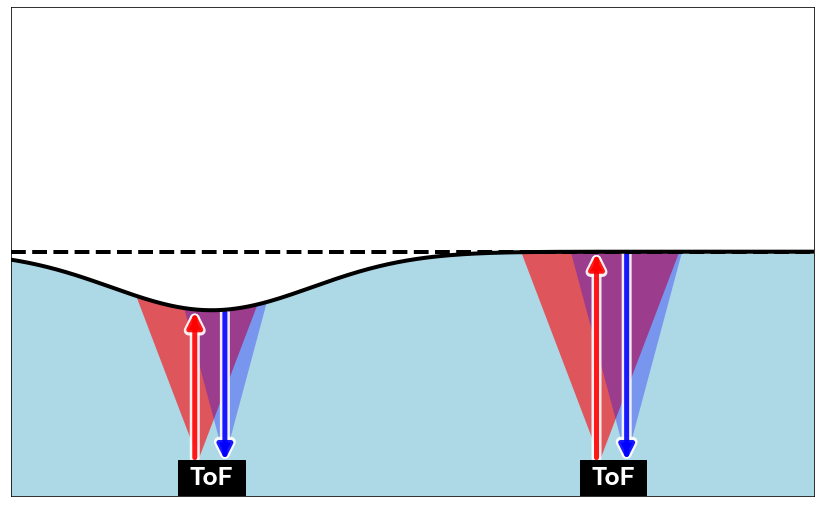

In [435]:
sensors  = plot_graph(2,balloon=True,show_label = False) # n개의 도형을 배치
plot_normal_distribution(mu=4, sigma=2, a=6, h_shift=0, v_shift=10, color='black', x_range=[-16, 16])
Arrow_pdf(3,10)
Arrow(11,10)


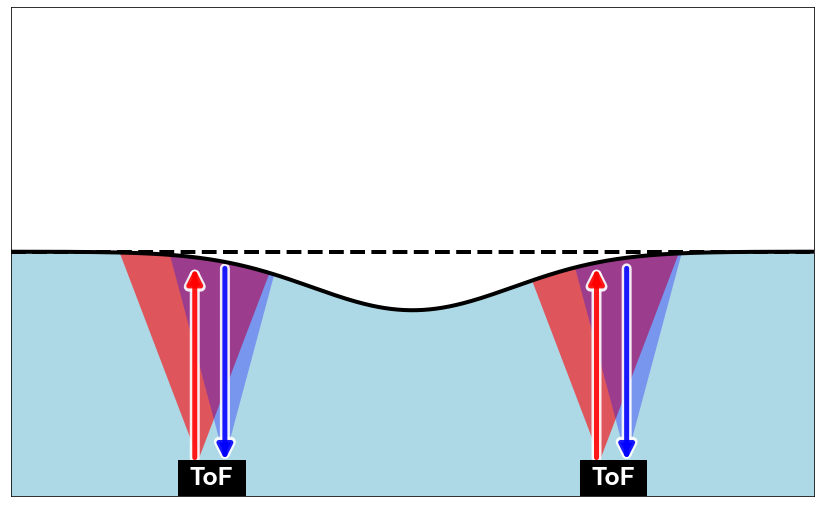

In [436]:
sensors  = plot_graph(2,balloon=True,show_label = False) # n개의 도형을 배치
plot_normal_distribution(mu=4, sigma=2, a=6, h_shift=4, v_shift=10, color='black', x_range=[-16, 16])
Arrow(3,9.7)
Arrow(11,9.7)

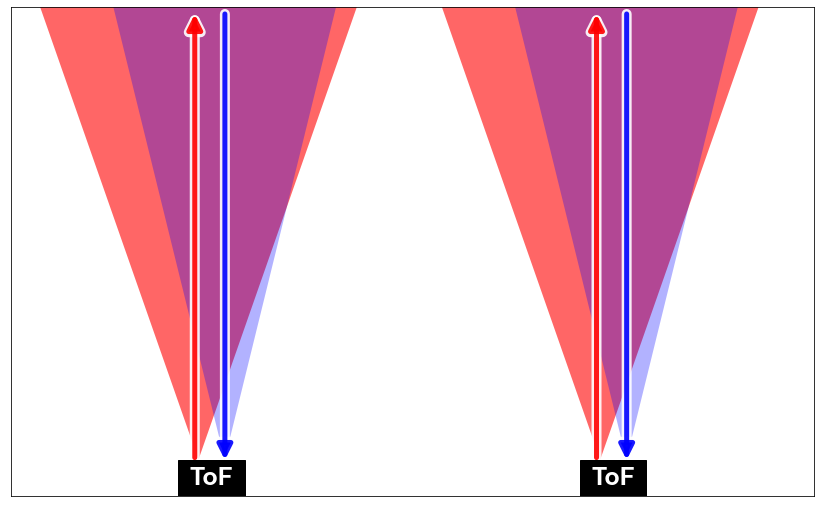

In [440]:
sensors  = plot_graph(2,balloon=False,show_label = False) # n개의 도형을 배치
Arrow(3,14.9)
Arrow(11,14.9)

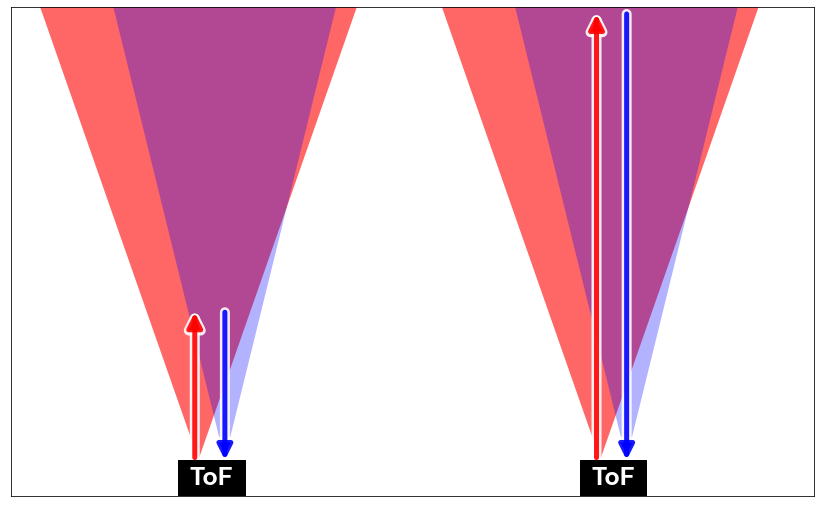

In [441]:
sensors  = plot_graph(2,balloon=False,show_label = False) # n개의 도형을 배치
Arrow_pdf(3,10)
Arrow(11,14.9)

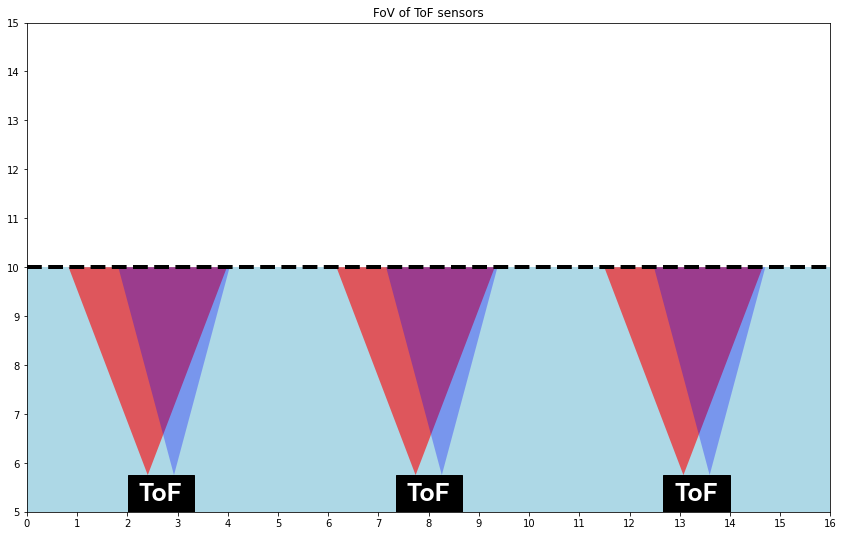

In [414]:
sensors  = plot_graph(3) # n개의 도형을 배치

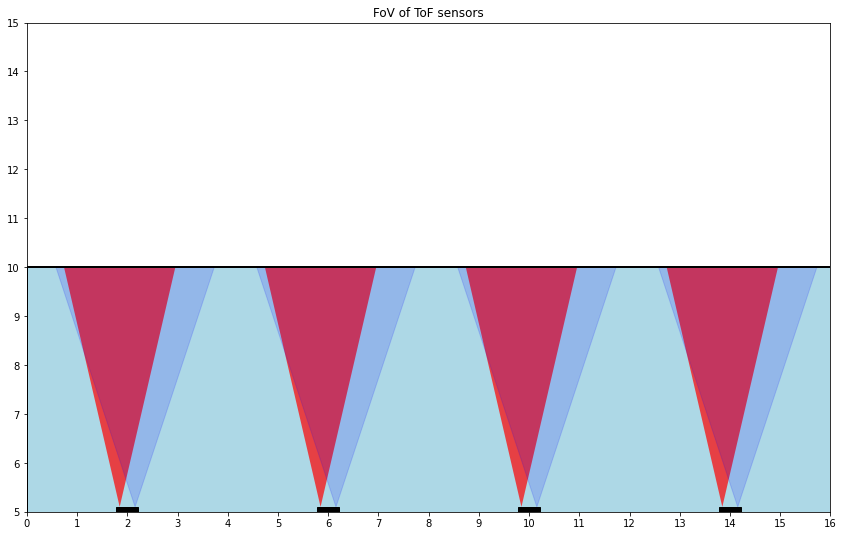

In [172]:
sensors  = plot_graph(4) # n개의 도형을 배치

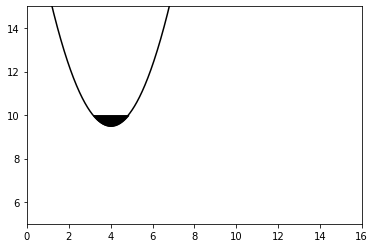

In [173]:
plot_quadratic_with_fill(0.7, 4, 9.5,color_below='black')
plt.xlim(0, 16)
plt.ylim(5, 15)
plt.show()

In [157]:
r/size

5.0

In [166]:
L/size

16.0

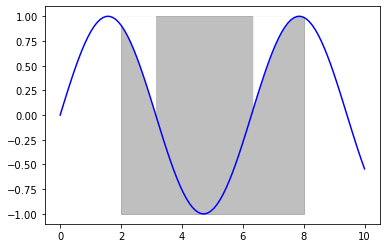

In [125]:
import matplotlib.pyplot as plt
import numpy as np

# 예제 데이터 생성
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()

# add_patch로 직사각형 그리기 (zorder 조절)
rect = plt.Rectangle((2, -1), 6, 2, color="grey", alpha=0.5, zorder=1)
ax.add_patch(rect)

# fill_between으로 영역 채우기
ax.fill_between(x, y, 1, where=(y > 0), color='white', alpha=1, zorder=2)

# 데이터 플롯
ax.plot(x, y, color="blue", zorder=3)

plt.show()


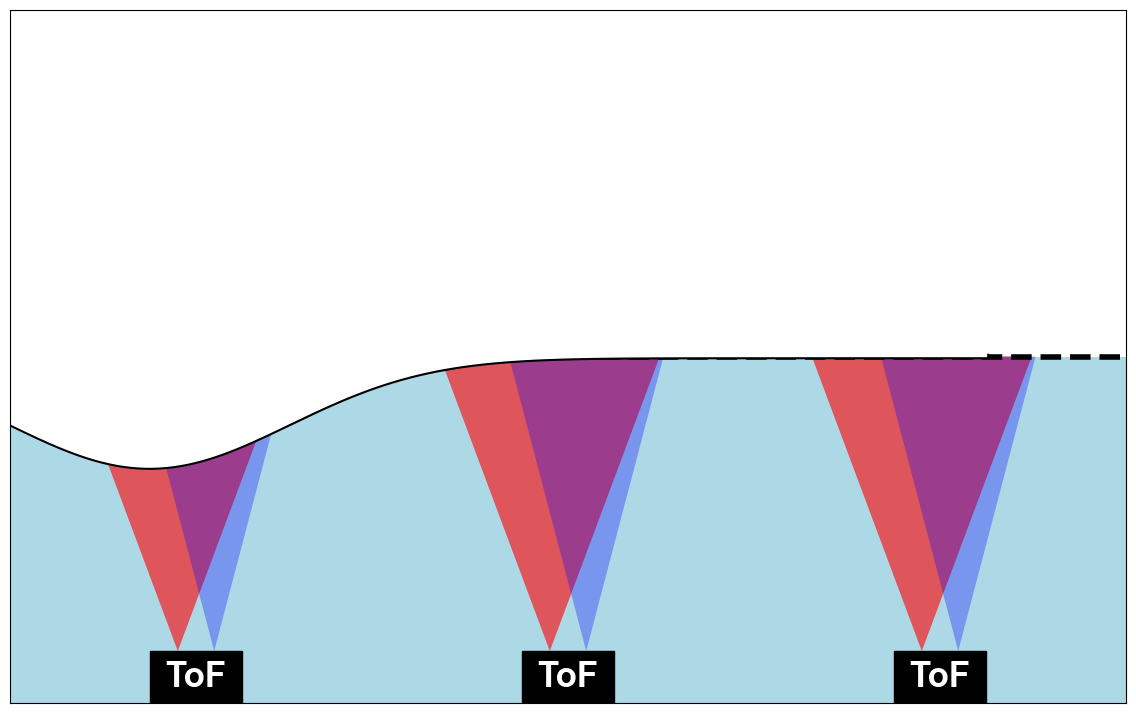

In [32]:
sensors  = plot_graph(3,balloon=True,show_label = False) # n개의 도형을 배치
plot_normal_distribution(mu=4, sigma=2, a=8, h_shift=-2, v_shift=10, color='black', x_range=[-16, 16])